<a href="https://colab.research.google.com/github/HarshithRKumar/Machine-Learning-Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['date','street','city','statezip','country']
for i in col:
  df[i]=le.fit_transform(df[i])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [ ]:
df=df.drop(['date','country'],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31


<Axes: ylabel='sqft_basement'>

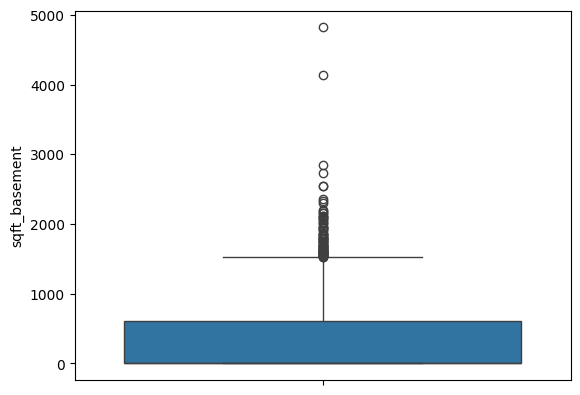

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['sqft_basement'])

In [ ]:
#iqr method
q1=df['sqft_basement'].quantile(0.25)
q3=df['sqft_basement'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print('upper range:',upper)
print('lower range:',lower)

upper range: 1525.0
lower range: -915.0


In [ ]:
#trimming method
new_df=df[(df['sqft_basement']<upper) & (df['sqft_basement']>lower)]
print('orginal dat:',len(df))
print('new data:',len(new_df))

orginal dat: 4600
new data: 4518


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
x=new_df.drop('price',axis=1)
y=new_df['price']

scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
svm=SVR()
param_grid={
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
    }
grid=GridSearchCV(svm,param_grid,cv=5)
grid.fit(x_train,y_train)
y_pred=grid.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score:',r2)
print('best parameters:',grid.best_params_)
print('best score:',grid.best_score_)
print('test accuracy:',grid.score(x_test,y_test))

r2 score: 0.12062678779642488
best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
best score: 0.0742679593727271
test accuracy: 0.12062678779642488
